In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
#from google.colab.patches import cv2_imshow

## **Test Case 2**

In [102]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

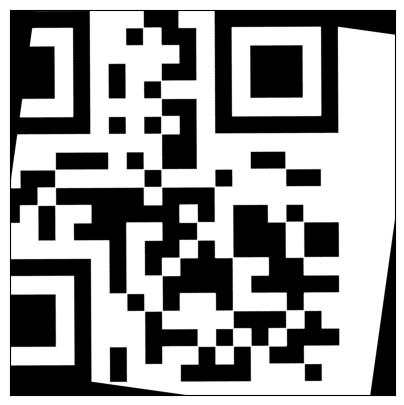

In [103]:
img = cv2.imread("02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img, -8)

kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(dilated_img, cmap='gray');

## **Test Case 3**

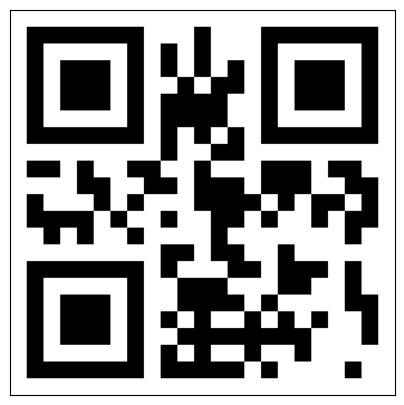

In [104]:
img = cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
#_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 4**

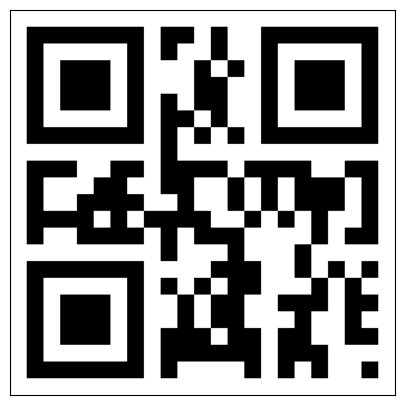

In [105]:
img = cv2.imread("04-Black-mirror.png")
img = 255 - img
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
img = cv2.flip(img, 1)
fig = plt.figure(figsize=(5, 5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(img, cmap='gray')

## **Test Case 5**

In [106]:
def add_quiet_zone(qr_img, border_size = 20):
    height, width = qr_img.shape
    new_img = np.full((height + 2*border_size, width + 2*border_size), 255, dtype=np.uint8)
    new_img[border_size:border_size + height, border_size:border_size + width] = qr_img
    
    return new_img

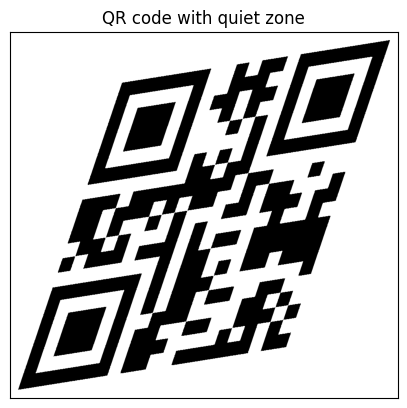

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "06-Railfence-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Adjust the binarization threshold to improve quiet zone detection
_, img_binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Reinitialize the start and end positions for rows and columns
start_row = -1
start_col = -1
end_row = -1
end_col = -1

# Find the first black pixel in each row and column to set boundaries
# Find start row
for row_index in range(img_binary.shape[0]):
    if any(img_binary[row_index] < 255):
        start_row = row_index
        break

# Find end row
for row_index in range(img_binary.shape[0] - 1, -1, -1):
    if any(img_binary[row_index] < 255):
        end_row = row_index + 1
        break

# Find start column
for col_index in range(img_binary.shape[1]):
    if any(img_binary[:, col_index] < 255):
        start_col = col_index
        break

# Find end column
for col_index in range(img_binary.shape[1] - 1, -1, -1):
    if any(img_binary[:, col_index] < 255):
        end_col = col_index + 1
        break

# Check if the boundaries are valid
if (start_row >= 0 and end_row > start_row) and (start_col >= 0 and end_col > start_col):
    # Crop the image using the detected boundaries
    qr_no_quiet_zone = img_binary[start_row:end_row, start_col:end_col]

    qr_with_quiet_zone = add_quiet_zone(qr_no_quiet_zone, 20)

    # Display the QR code without the quiet zone
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("QR code with quiet zone")
    #plt.imshow(qr_no_quiet_zone, cmap="gray")
    plt.imshow(qr_with_quiet_zone, cmap="gray")  # Display the corrected image
else:
    print("Error: Could not find valid boundaries. Please check the image or preprocessing.")

## **Test Case 6**

/var/folders/xd/m03fffl12yg6w4cjfgzx_59w0000gn/T/ipykernel_23153/1226686946.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


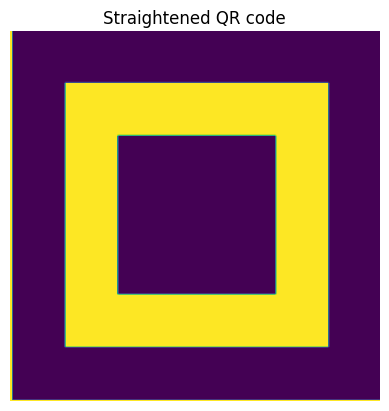

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert it to grayscale
img_path = "07-THE-MIGHTY-FINGER.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply binarization with a threshold to create a binary image
_, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Detect edges and contours to find the bounding box of the QR code
edges = cv2.Canny(img_binary, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour and get the minimum area rectangle to straighten the QR code
largest_contour = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect)
box = np.int0(box)

# Define the width and height for the perspective transformation
width = int(rect[1][0])
height = int(rect[1][1])

# Define source and destination points for perspective transformation
src_pts = box.astype("float32")
dst_pts = np.array([[0, height - 1], [0, 0], [width - 1, 0], [width - 1, height - 1]], dtype="float32")

# Create the perspective transformation matrix and apply it to straighten the QR code
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
straightened_qr = cv2.warpPerspective(img_binary, M, (width, height))

# Display the straightened QR code
plt.imshow(straightened_qr, cmap="gray")
plt.title("Straightened QR code")
plt.axis("off")
plt.imshow(straightened_qr)

## **Trying to generalize**

In [109]:
def generalize_preprocessing(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    preprocess_steps = [
        lambda x: x,
        cv2.bitwise_not,
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),
        lambda x: cv2.rotate(x, cv2.ROTATE_180),
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),
    ]

    for step in preprocess_steps:
        processed_img = step(img)
        img_threshold = cv2.adaptiveThreshold(processed_img, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)
        plt.figure(figsize=(5, 5))
        plt.imshow(img_threshold, cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()

## **Test Case 7 the mighty Zinger**

<function matplotlib.pyplot.show(close=None, block=None)>

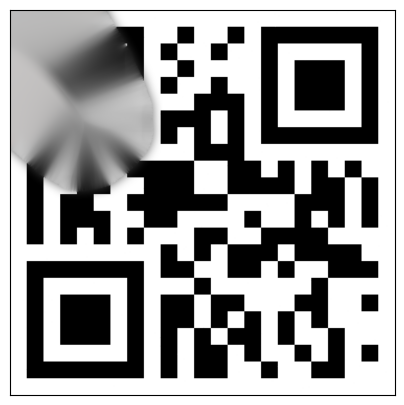

In [110]:
image_path = "07-THE-MIGHTY-FINGER.png"
image = cv2.imread(image_path)

#height, width, _ = image.shape
#mask= np.zeros((height, width), np.uint8)

#mask[height//2:, :width//2] = 255

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

saturation_threshold = 0
_, thumb_mask = cv2.threshold(s, saturation_threshold, 255, cv2.THRESH_BINARY)

#kernel = np.ones((3, 3), np.uint8)
#thumb_mask = cv2.morphologyEx(thumb_mask, cv2.MORPH_CLOSE, kernel)

inpainted_image = cv2.inpaint(image, thumb_mask, 50, cv2.INPAINT_TELEA)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

#inpainted_image = image - inpainted_image
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(inpainted_image_rgb);
plt.show

## **Test Case 8**

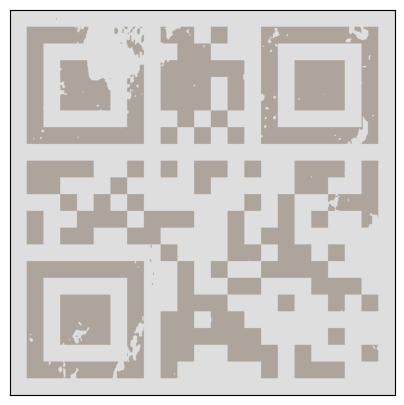

In [111]:
img = cv2.imread("08-Compresso-Espresso.png")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
#dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
#opening = cv2.morphologyEx(_, cv2.MORPH_OPEN, kernel)


fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 9**


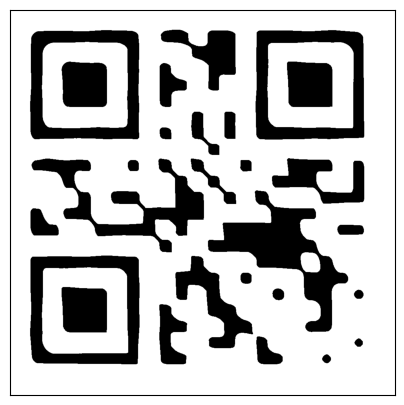

In [112]:
def sharpen_img(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    return cv2.filter2D(image, -1, kernel)

def add_quiet_zone(image, border_size=10):

    return cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=[255, 255, 255])

img = cv2.imread("09-My-phone-fell-while-taking-this-one-...-or-did-it.png", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img_thresh = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img_sharpened = sharpen_img(img_thresh)
edges = cv2.Canny(img_sharpened, 100, 200)
img_combined = cv2.bitwise_or(img_sharpened, edges)
img_final = add_quiet_zone(img_combined, 20)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_final, cmap='gray');

## **Test case: 10 and now it is similar to test case 7 the mighty Zinger**

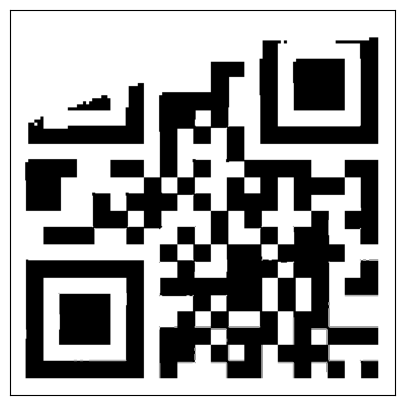

In [113]:
def fill_missing_area(img, mask, method=cv2.INPAINT_TELEA):
    return cv2.inpaint(img, mask, 3, method)

img = cv2.imread("10-Gone-With-The-Wind.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)

mask = np.zeros(img.shape, dtype=np.uint8)
mask[0:int(img.shape[0]), int(img.shape[1]):img.shape[1]] = 255

img_filled = fill_missing_area(img, mask)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_filled, cmap='gray');

## **Test Case 11**

No QR code detected.


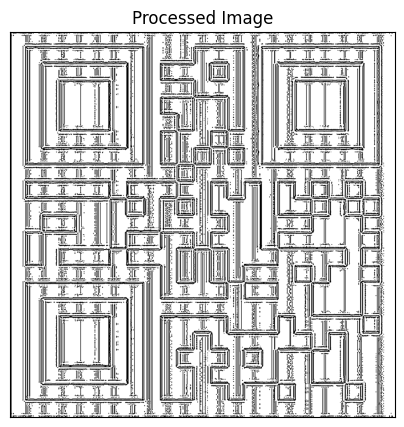

''

In [114]:
def enhance_image_for_qr_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 1: Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (9, 9), 0)

    # Step 2: Adaptive Thresholding to create a clear binary image
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Step 3: Morphological operations to clear up the image (optional)
    kernel = np.ones((3,3), np.uint8)
    # To clean up the smaller dots or holes in the QR code, you can use morphological closing
    morphology = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    # Initialize the QRCode detector
    detector = cv2.QRCodeDetector()

    # Detect and decode the QR code
    data, vertices, _ = detector.detectAndDecode(morphology)

    # Check if there is a QR code in the image
    if vertices is not None:
        print("QR Code detected and decoded.")
        print("Data:", data)
        
        # Show the detected area in the original image
        vertices = np.int32(vertices).reshape(-1, 2)
        for j in range(vertices.shape[0]):
            cv2.line(image, tuple(vertices[j]), tuple(vertices[(j+1) % vertices.shape[0]]), (255,0,0), 5)
        plt.imshow(image, cmap='gray')
        plt.title("QR Code Detected")
        plt.show()
    else:
        print("No QR code detected.")
        fig = plt.figure(figsize=(5, 5))
        plt.xticks([], [])
        plt.yticks([], [])
        plt.imshow(morphology, cmap='gray')
        plt.title("Processed Image")
        plt.show()

    return data

# Example usage
image_path = '11-weewooweewooweewoo.png'  # Replace with the path to your QR code image
enhance_image_for_qr_detection(image_path)


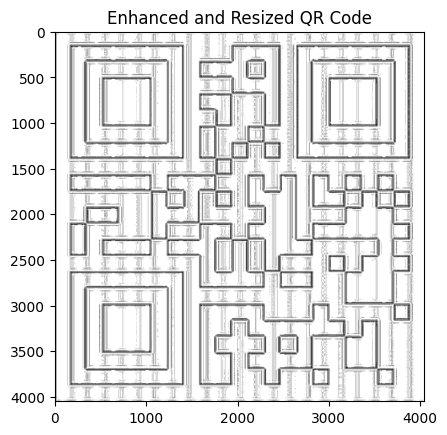

True

In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "11-weewooweewooweewoo.png"  # Adjust the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to add more pixels, using interpolation
resized = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

# Apply adaptive thresholding again
adaptive_thresh = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Sharpening the image using a kernel
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(adaptive_thresh, -1, kernel)

# Display the processed image
plt.imshow(sharpened, cmap='gray')
plt.title('Enhanced and Resized QR Code')
plt.show()

# Save the result if needed
cv2.imwrite('11-weewooweewooweewoo.png', sharpened)


## **Test Case 12**

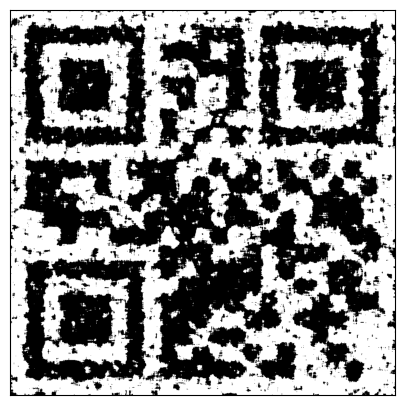

In [116]:
img = cv2.imread("12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img,15)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 13**

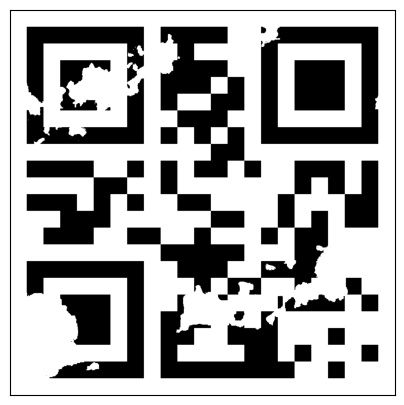

In [117]:
img = cv2.imread("13-2el-noor-2ata3.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
#img = cv2.medianBlur(img,5)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 14**

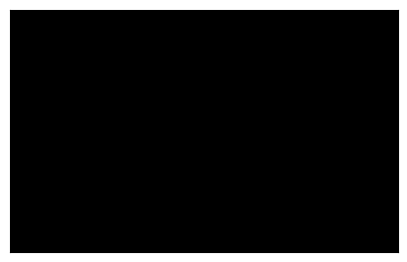

In [118]:
img = cv2.imread("14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img = rotate_image(img,-22)

#awl parameter ymeen w shemal wel tany foo2 w taht
tl = (542,585)
bl = (540,715)
tr = (678,587)
br = (675,715)

cv2.circle(img , tl , 5 ,(0,0,255),-1)
cv2.circle(img , bl , 5 ,(0,0,255),-1)
cv2.circle(img , tr , 5 ,(0,0,255),-1)
cv2.circle(img , br , 5 ,(0,0,255),-1)

#pts1 = [tl , br , tr , br]
#pts2 = [[0,0] , [0,480] , [640,0],[640,480]]

pts1 = np.array([tl, br, tr, br], dtype=np.float32)
pts2 = np.array([[0,0] , [0,480] , [640,0],[640,480]], dtype=np.float32)

matrix = cv2.getPerspectiveTransform(pts1,pts2)
img = cv2.warpPerspective(img,matrix,(800,500))

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 15**

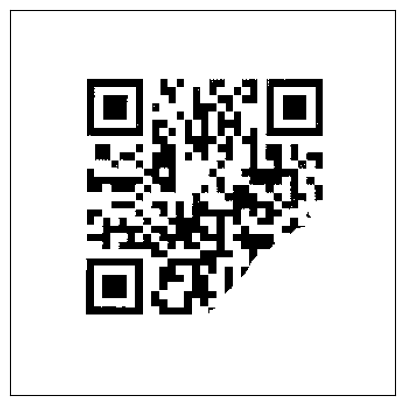

In [119]:
img = cv2.imread("15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 16** 

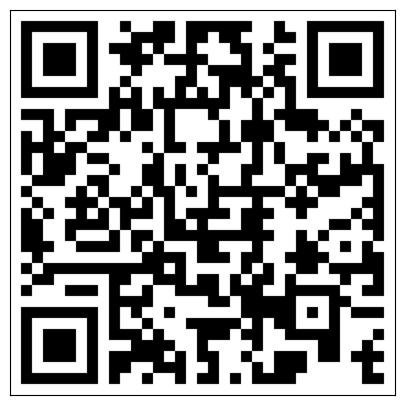

In [120]:
img = cv2.imread("16-V3-QR-Code...-can-you-do-it.png")
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');